Завдання 1. На основі файлу banking.csv:
Сформуйте тестовий тренувальний датасет (розмір тестової частини 0.3)
Завдання 2.
Застосуйте логістичну регресію для прогнозування цільової метрики (ймовірність того, що клієнт відкриє вклад у банку).
Завдання 3.
Оцініть модель за допомогою матриці похибок, метрик precision, recall, F1-score. Побудуйте AUC-ROC криву для моделі.
та видали рядки з пропущеними значеннями

Матриця похибок:
[[10605   326]
 [  829   597]]

Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10931
           1       0.65      0.42      0.51      1426

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357


AUC-ROC: 0.9279


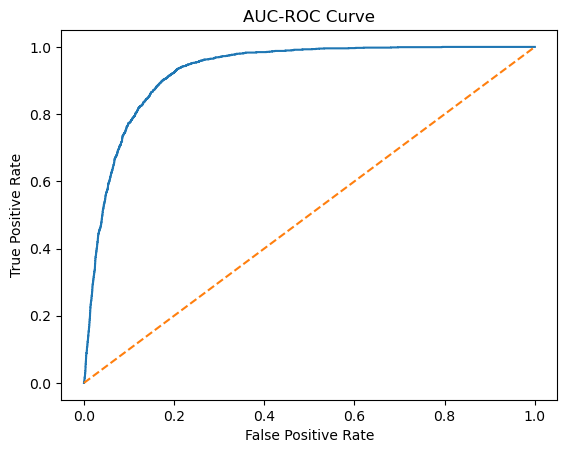

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('banking.csv')

# Видалення рядків з пропущеними значеннями
data = data.dropna()

# Розділення на вхідні ознаки (X) та цільову змінну (y)
X = data.drop('y', axis=1)
y = data['y']

# Виконання one-hot encoding для категоріальних змінних
X_encoded = pd.get_dummies(X)

# Розділення на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Створення та навчання моделі логістичної регресії
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Прогнозування цільової змінної для тестових даних
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Оцінка моделі
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Виведення результатів
print("Матриця похибок:")
print(confusion)
print("\nЗвіт про класифікацію:")
print(report)
print("\nAUC-ROC: %.4f" % auc_score)

# Побудова AUC-ROC кривої
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.show()


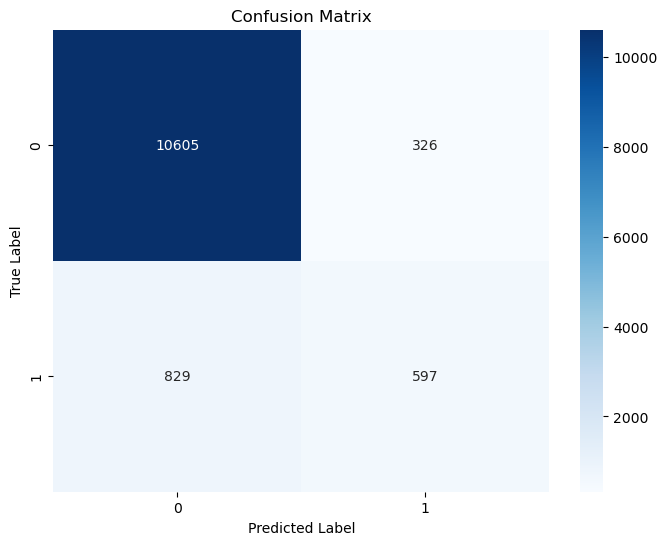

In [17]:
import seaborn as sns

# Функція для візуалізації матриці похибок
def plot_confusion_matrix(confusion):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Виклик функції для візуалізації матриці похибок
plot_confusion_matrix(confusion)
